#Library

In [ ]:
import pandas as pd 
import numpy as np 

#import nltk for natural language toolkit
from nltk.corpus import stopwords
import nltk 

#import re, unicode
import re, unicodedata

#import sklearn preprocessing 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#import sklearn for modeling
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#import sklearn for model evaluation 
from sklearn.metrics import classification_report, f1_score, confusion_matrix, roc_auc_score
#import visualization module 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#textblob
from textblob import Word
from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

#Load data kotor

##install tambahan library

In [ ]:
!pip install PyStemmer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install TextBlob
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_kotor = pd.read_csv('/content/drive/MyDrive/project/sentimentv5.csv')

In [ ]:
df_kotor.head(3)

,Unnamed: 0,Text
0,0,"Min, Cashback Mcdelivery kapan masuk ya?"
1,1,Min saya salah kirim gopay ke nomor orang lain...
2,2,Min knpa mau aktifin gopaylater cicil gk bisa ...


In [ ]:
df_kotor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5305 non-null   int64 
 1   Text        5305 non-null   object
dtypes: int64(1), object(1)
memory usage: 83.0+ KB


#Preprocessing data kotor


In [ ]:
df_kotor['Text']=df_kotor['Text'].astype(str)

##Cleaning

In [ ]:
def cleaningText(text):
    

    text = text.replace('\n', ' ') # replace new line into space
    text = text.strip(' ') # remove characters space from both left and right text
    text = text.lower()
    text = re.compile('rt @').sub('@',text,) #remove retweet (rt)
    text = re.sub(r"(?:\@|http|www.)\S+"," ",text) #remove url
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    text = text.replace("\n"," ") #remove \n
    text = text.replace("_"," ")
    text= text.replace("<a","")
    text = text.replace("</a>","")
    text = text.replace("br />",'') 
    text = text.replace("&quot",'')
    text = re.sub(r'[^\w\s]','',text)
    rpt_regex = re.compile(r"(.)\1{1,}",re.IGNORECASE)
    text = rpt_regex.sub(r"\1\1",text) #remove repeated word
    text = text.strip() #trim head and tail
    text = re.sub(' +',' ',text)#remove multiple space
    text = re.sub(r'[~^0-9]', '', text) #remove digits

    return text


In [ ]:
df_kotor['Text'] = df_kotor['Text'].apply(cleaningText)

In [ ]:
df_kotor.head()

,Unnamed: 0,Text
0,0,min cashback mcdelivery kapan masuk ya
1,1,min saya salah kirim gopay ke nomor orang lain...
2,2,min knpa mau aktifin gopaylater cicil gk bisa ...
3,3,ini gopay ada adminya ga sih kirim pesan dari ...
4,4,min kok saya ga bisa checkout pake gopaylater ...


In [ ]:
# membuat fungsi untuk menghapus karakter
import itertools

def remove_repeating_characters(text):
    return ''.join(''.join(s)[:1] for _, s in itertools.groupby(text))

# check fungsi tersebut
remove_repeating_characters('oooofel')

'ofel'

In [ ]:
# membuat fungsi menghilangkan alpanumeric
import re

def remove_nonalphanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    return text

# Check fungsi tersebut
remove_nonalphanumeric('S,,,e!!H;;at')

'S e H at'

In [ ]:
#membuat fungsi untuk merubah data ke lower case

def to_lower_case(text):
    return text.lower()

# Check fungsi tersebut
to_lower_case('Test ujI CobA')

'test uji coba'

In [ ]:

#mengabungkan ke 3 fungsi tersebut menjadi proses cleaning

def cleaning(text):
    text = remove_repeating_characters(text)
    text = remove_nonalphanumeric(text)
    text = to_lower_case(text)
    
    return text

# Check fungsi tersebut
cleaning('Saya\n\n\nTekun Belajar ')


'saya tekun belajar '

In [ ]:
#implementasi cleaning pada dataset "text" 

df_kotor['sentiment'] = df_kotor['Text'].apply(lambda x: cleaning(x))
df_kotor.head()

,Unnamed: 0,Text,sentiment
0,0,min cashback mcdelivery kapan masuk ya,min cashback mcdelivery kapan masuk ya
1,1,min saya salah kirim gopay ke nomor orang lain...,min saya salah kirim gopay ke nomor orang lain...
2,2,min knpa mau aktifin gopaylater cicil gk bisa ...,min knpa mau aktifin gopaylater cicil gk bisa ...
3,3,ini gopay ada adminya ga sih kirim pesan dari ...,ini gopay ada adminya ga sih kirim pesan dari ...
4,4,min kok saya ga bisa checkout pake gopaylater ...,min kok saya ga bisa checkout pake gopaylater ...


##Tokenizing

In [ ]:
def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
df_kotor['sentiment'] = df_kotor['sentiment'].apply(tokenizingText)

In [ ]:
df_kotor.head(3)

,Unnamed: 0,Text,sentiment
0,0,min cashback mcdelivery kapan masuk ya,"[min, cashback, mcdelivery, kapan, masuk, ya]"
1,1,min saya salah kirim gopay ke nomor orang lain...,"[min, saya, salah, kirim, gopay, ke, nomor, or..."
2,2,min knpa mau aktifin gopaylater cicil gk bisa ...,"[min, knpa, mau, aktifin, gopaylater, cicil, g..."


##Filtering

In [ ]:
def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

In [ ]:
from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')

In [ ]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df_kotor['sentiment'] = df_kotor['sentiment'].apply(stopwords_removal)

##Stopword

In [ ]:
#Menghapus Stopword Untuk Menghapus Kata-Kata Yang Kurang Bernilai Dalam Sebuah Document Dengan Beberapa Langkah Dibawah Ini

from nltk.corpus import stopwords

# ----------------------- NLTK Stopword Dengan Bahasa Indonesia -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- Menambahkan Stopword Secara Manual  ------------------------------------
# Tambahan Stopword
list_stopwords.extend(["dh", "rp","yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])


# Convert List Kedalam Dictionary
list_stopwords = set(list_stopwords)


#Fungsi Untuk Menghapus Stopword
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df_kotor['sentiment'] = df_kotor['sentiment'].apply(stopwords_removal) 
df_kotor.head(3)

,Unnamed: 0,Text,sentiment
0,0,min cashback mcdelivery kapan masuk ya,"[min, cashback, mcdelivery, masuk]"
1,1,min saya salah kirim gopay ke nomor orang lain...,"[min, salah, kirim, gopay, nomor, orang, tolon..."
2,2,min knpa mau aktifin gopaylater cicil gk bisa ...,"[min, knpa, aktifin, gopaylater, cicil, gk, pa..."


##Stemming

In [ ]:
#stemming
def stemmingText(text): 
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

In [ ]:
%%time
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
df_kotor['sentiment'] = df_kotor['sentiment'].apply(stemmingText)

CPU times: user 1h 2min 30s, sys: 11.7 s, total: 1h 2min 41s
Wall time: 1h 2min 57s


In [ ]:
df_kotor.head()

,Unnamed: 0,Text,sentiment
0,0,min cashback mcdelivery kapan masuk ya,"[min, cashback, mcdelivery, masuk]"
1,1,min saya salah kirim gopay ke nomor orang lain...,"[min, salah, kirim, gopay, nomor, orang, tolon..."
2,2,min knpa mau aktifin gopaylater cicil gk bisa ...,"[min, knpa, aktifin, gopaylater, cicil, gk, pa..."
3,3,ini gopay ada adminya ga sih kirim pesan dari ...,"[gopay, adminya, kirim, pesan, jumat, sampe, d..."
4,4,min kok saya ga bisa checkout pake gopaylater ...,"[min, checkout, pake, gopaylater, cicil, tokop..."


#Load data Bersih

In [ ]:
df  =  pd.read_excel('/content/drive/MyDrive/project/svm/data4000.xlsx')

In [ ]:
df.head(3)

,Unnamed: 0,label,text_clean,Unnamed: 3
0,0,neutral,min cashback mcdelivery kapan masuk ya,NaN
1,1,neutral,min saya salah kirim gopay ke nomor orang lain...,NaN
2,2,negative,min knpa mau aktifin gopaylater cicil gk bisa ...,


In [ ]:
#menghilangkan netral
df = df[df.label != 'neutral']
df.head(3)

,Unnamed: 0,label,text_clean,Unnamed: 3
2,2,negative,min knpa mau aktifin gopaylater cicil gk bisa ...,
3,3,negative,ini gopay ada adminya ga sih kirim pesan dari ...,NaN
4,4,negative,min kok saya ga bisa checkout pake gopaylater ...,NaN


In [ ]:
df.drop(['Unnamed: 0', 'Unnamed: 3'], axis=1, inplace=True)

In [ ]:
df.reset_index()
df.head(3)

,label,text_clean
2,negative,min knpa mau aktifin gopaylater cicil gk bisa ...
3,negative,ini gopay ada adminya ga sih kirim pesan dari ...
4,negative,min kok saya ga bisa checkout pake gopaylater ...


In [ ]:
df['label'].value_counts()

negative    2808
positive    1399
Name: label, dtype: int64

#EDA

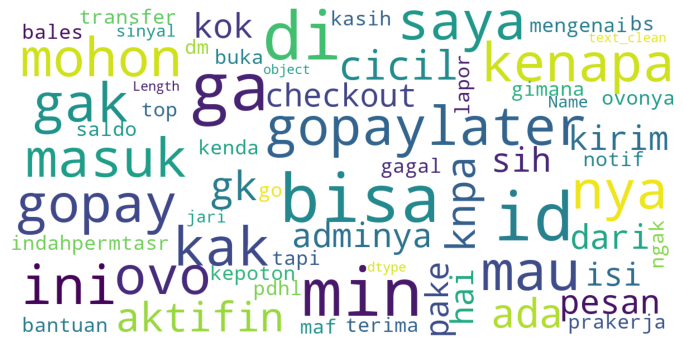

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['text_clean'])

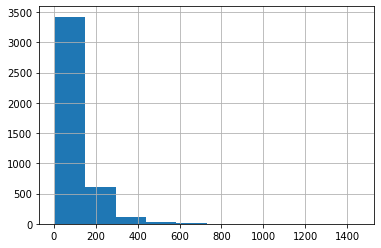

count    4207.000000
mean      102.682909
std        94.253322
min         4.000000
25%        46.000000
50%        77.000000
75%       128.000000
max      1457.000000
dtype: float64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df_len = [len(x) for x in df['text_clean']]
pd.Series(df_len).hist()
plt.show()
pd.Series(df_len).describe()

In [ ]:
#label encoding
from sklearn import preprocessing
def label_encoder(data):
    le = preprocessing.LabelEncoder()
    data = le.fit_transform(data)
    return data

In [ ]:
df['label'] = label_encoder(df['label'])
df.head(3)

,label,text_clean
2,0,min knpa mau aktifin gopaylater cicil gk bisa ...
3,0,ini gopay ada adminya ga sih kirim pesan dari ...
4,0,min kok saya ga bisa checkout pake gopaylater ...


In [ ]:
#negatif = 0 positif =1
df['label'].value_counts()

0    2808
1    1399
Name: label, dtype: int64

#preprocessing data bersih

In [ ]:
#def tokenizingText(text): 
 #   text = word_tokenize(text) 
  #  return text

#def filteringText(text): # Remove stopwors in a text
 #   listStopwords = set(stopwords.words('indonesian'))
  #  filtered = []
   # for txt in text:
    #    if txt not in listStopwords:
     #       filtered.append(txt)
    #text = filtered 
    #return text

In [ ]:
#from nltk.tokenize import word_tokenize
#df['text_clean'] = df['text_clean'].apply(tokenizingText)
#df['text_clean'] = df['text_clean'].apply(filteringText)

#Pembobotan TF-IDF

In [ ]:
#fidf = TfidfVectorizer()
#response = tfidf.fit_transform(df['text_clean'])

In [ ]:
#feature_names = tfidf.get_feature_names()
#for col in response.nonzero()[1]:
 #   print (feature_names[col], ' - ', response[0, col])

In [ ]:
#import sklearn preprocessing 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Membuat object TF-IDF
tfidf = TfidfVectorizer()

In [ ]:
#Membuat variabel x dan y
x_df = df['text_clean']
y_df = df['label']

x = np.array(x_df)
y = np.array(y_df)

In [ ]:
#tfidf vectorizer
x_tfidf = tfidf.fit_transform(x)

In [ ]:
#train test split using tfidfvectorizer 
train_x_tfidf, test_x_tfidf, train_y, test_y = train_test_split(x_tfidf, y, test_size=0.30, random_state=42)

In [ ]:
#hasil pembobota
train_x_tfidf.shape

(2944, 6905)

In [ ]:
#hasil pembobotan
print(train_x_tfidf)

  (0, 1112)	0.4009235778240031
  (0, 3135)	0.41541616734187026
  (0, 953)	0.3896822520604799
  (0, 4631)	0.372731755396051
  (0, 62)	0.2757411785223154
  (0, 4636)	0.10735232008053142
  (0, 1875)	0.2553150208352938
  (0, 3720)	0.2138445737376995
  (0, 1276)	0.21000164180460842
  (0, 560)	0.21323393470449106
  (0, 6833)	0.1539034203945267
  (0, 1364)	0.1211327671036861
  (0, 4690)	0.17409645826052442
  (0, 25)	0.13855362333454374
  (1, 4650)	0.5779470958211912
  (1, 4636)	0.2871846493384876
  (1, 3684)	0.6054685749062771
  (1, 4690)	0.4657359084472042
  (2, 4636)	0.25825968482012457
  (2, 3684)	0.5444863563702642
  (2, 2530)	0.37790547988435674
  (2, 473)	0.4868170522506848
  (2, 1060)	0.41486435640821856
  (2, 1364)	0.2914115897087248
  (3, 6030)	0.3691612952420603
  :	:
  (2940, 2749)	0.27274004493163634
  (2940, 3906)	0.32655034987777465
  (2940, 3789)	0.3252306036614875
  (2940, 4690)	0.2029499285118603
  (2940, 2227)	0.1611161680616744
  (2940, 2176)	0.2577444950747502
  (2941, 259

#Model SVM Biasa

In [ ]:
from sklearn.svm import SVC
svm = SVC(C=10, kernel='linear')
model_svmbiasa = svm.fit(train_x_tfidf,train_y)

In [ ]:
svm_prediction =  model_svmbiasa.predict(test_x_tfidf)

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
svm_acc = accuracy_score(svm_prediction,test_y)
svm_acc

0.8891528107680127

In [ ]:
print(classification_report(test_y, svm.predict(test_x_tfidf)))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       843
           1       0.86      0.80      0.83       420

    accuracy                           0.89      1263
   macro avg       0.88      0.87      0.87      1263
weighted avg       0.89      0.89      0.89      1263



In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
y_preds = model_svmbiasa.predict(test_x_tfidf)
multilabel_confusion_matrix(test_y, y_preds )

array([[[335,  85],
        [ 55, 788]],

       [[788,  55],
        [ 85, 335]]])

##cross val

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(model_svmbiasa, test_x_tfidf, test_y, cv=5)

In [ ]:
print(scores)

[0.88537549 0.8972332  0.88142292 0.85714286 0.87301587]


#Model SVM RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
svc =  SVC(C=1, kernel="linear",gamma="scale", verbose=False, max_iter=1000, decision_function_shape="ovr")


In [ ]:
rfe = RFE(svc, step=0.10)

In [ ]:
%%time
y_predict = rfe.fit(train_x_tfidf,train_y)
featureidx = y_predict.get_support()

CPU times: user 3.59 s, sys: 24 ms, total: 3.61 s
Wall time: 3.62 s


In [ ]:
accuracy = []
accuracy.append(rfe.score(test_x_tfidf, test_y))

In [ ]:
print(classification_report(test_y, y_predict.predict(test_x_tfidf)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       843
           1       0.93      0.80      0.86       420

    accuracy                           0.91      1263
   macro avg       0.92      0.88      0.90      1263
weighted avg       0.91      0.91      0.91      1263



In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
y_preds = y_predict.predict(test_x_tfidf)
multilabel_confusion_matrix(test_y, y_preds )

array([[[335,  85],
        [ 27, 816]],

       [[816,  27],
        [ 85, 335]]])

##Confusion Matrix

In [ ]:
print(classification_report(test_y, y_predict.predict(test_x_tfidf)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       843
           1       0.93      0.80      0.86       420

    accuracy                           0.91      1263
   macro avg       0.92      0.88      0.90      1263
weighted avg       0.91      0.91      0.91      1263



In [ ]:
#%%time
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import cross_val_score,train_test_split,LeaveOneOut


#X = np.array(x_df)
#y = np.array(y_df)

#loo = LeaveOneOut()
#loo.get_n_splits(X)
#LeaveOneOut()

#accuracy = []

#for train_index, test_index in loo.split(X):
#  X_train, X_test = pd.DataFrame(X[train_index]), pd.DataFrame(X[test_index]) # use this for training the model
#  y_train, y_test = y[train_index].ravel(), y[test_index].ravel() # use this for testing the model

#  SVM = LinearSVC()
#  model = SVM.fit(train_x_tfidf,train_y) # fit the model using training data
#  accuracy.append(SVM.score(test_x_tfidf, test_y))

#SVM_RFE_LE_mean = np.array(accuracy).mean()

In [ ]:
#print(classification_report(test_y, model.predict(test_x_tfidf)))

In [ ]:
#cm = classification_report(test_y, model.predict(test_x_tfidf))

In [ ]:
#print(cm)

Text(69.0, 0.5, 'Benar')

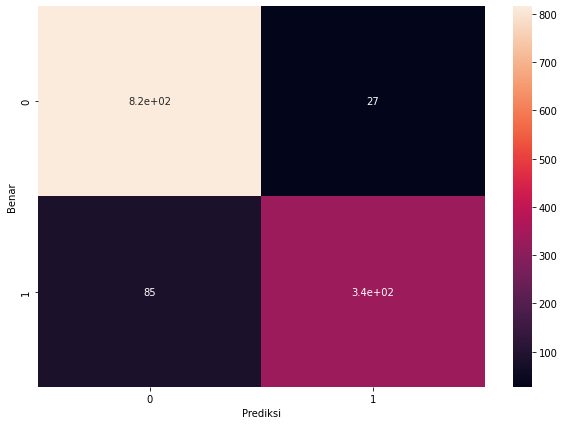

In [ ]:
#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
cm = confusion_matrix(test_y, y_preds)
 
#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Prediksi')
plt.ylabel('Benar')

In [ ]:
#from sklearn.model_selection import KFold


#kfold=KFold(n_splits=5, shuffle=True, random_state=0)


#linear_svc=SVC(kernel='linear')


#linear_scores = cross_val_score(linear_svc, test_x_tfidf, test_y, cv=kfold)

In [ ]:
#print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))


##Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(y_predict, test_x_tfidf, test_y, cv=10)

In [ ]:
print(scores)

[0.85826772 0.91338583 0.91338583 0.91269841 0.8968254  0.92063492
 0.86507937 0.8968254  0.9047619  0.92063492]


##ROC AUC

In [ ]:
# plot ROC Curve
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import roc_curve

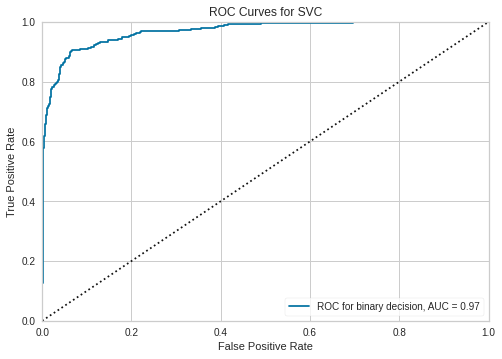

In [ ]:
binary_classifiers = [              
    SVC()                  
]
for classifier in binary_classifiers:
    oz = ROCAUC(classifier, micro=False, macro=False, per_class=False)
    oz.fit(train_x_tfidf,train_y)
    oz.score(test_x_tfidf, test_y)
    g = oz.show()